# **Multivariate Linear Regression**
Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. 

Simple linear regression have one dependent and one independent variable, but in multiple linear regression the dependent variable is one but there may be two or more independent variables.

The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

<img src = 'a_img.png'>

In multple linear regression each coefficient is interpreted as the estimate change in Y corresponds to one unit change in a variable, when other variables held constant.

Linear regression is used to predict prices, weather, stock prices, quality of items, sales, etc. It is a model useful for finding the correlation between the two factors, independent variables(used to make predictions) and the dependent variable(the values to be predicted).

<img src = 'b_img.png' width="1000" height="1000">

<hr>

# __Admission Dataset__

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1.    GRE (Graduate Record Examination) Scores (out of 340)
2.    TOEFL Scores (out of 120)
3.    University Rating (out of 5)
4.    Statement of Purpose and Letter of Recommendation Strength (out of 5)
5.    Undergraduate GPA (out of 10)
6.    Research Experience (either 0 or 1)
7.    Chance of Admit (ranging from 0 to 1)

**How to find the best coefficients to determine Y?**

Two things we need to consider when we choose the coefficients, they are

1.    The independent variable must have a strong correlation with the dependent variable.
2.    The independent variable should not have a good correlation with any other independent variable.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### __Hapus Feature 'Serial No.'__

In [5]:
df = df.drop(['Serial No.'], axis = 1)

In [6]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


### __Checking Missing Values__

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### __Checking Shape of Dataset__

In [8]:
df.shape

(400, 8)

### __Descriptive Analysis__

In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### __Correlation Analysis__

In [10]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


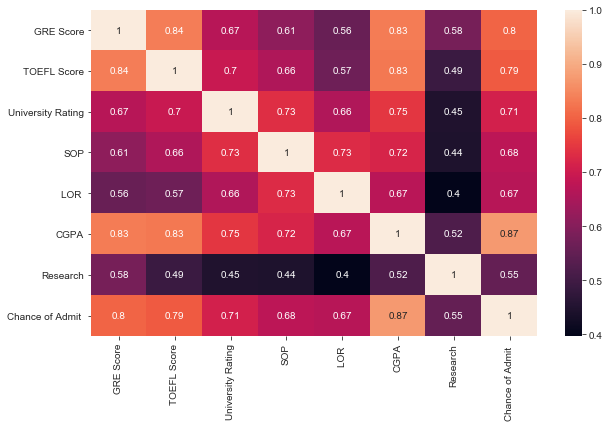

In [11]:
corr_data = df.corr()
plt.figure(figsize = (10, 6))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

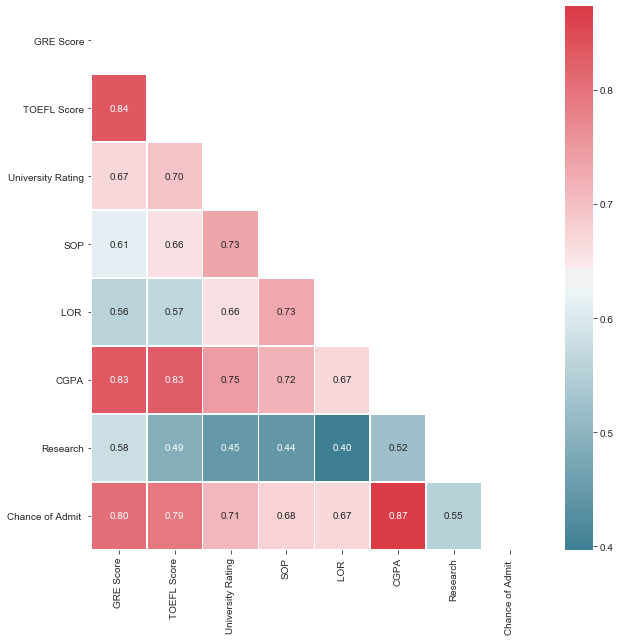

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

__Variabel Independent (Feature)__ : GRE SCORE, TOEFL, UNIVERSITY, SOP, LOR, CGPA, RESEARCH

__Variabel Dependen (Target)__ : Chance of Admit

SYARAT/ASUMSI YANG HARUS TERPENUHI SAAT MENGGUNAKAN LINEAR REGRESSION:

1. TIDAK ADA MULTIKOLINEARITAS

GRE SCORE   --0.83--    CGPA

GRE SCORE   --0.84--   TOEFL

TOEFL       --0.83--    CGPA

__DI ANTARA 3 FEATURE INI MANA YANG AKAN DIAMBIL?__

Di antara 3 feature, kita lihat mana yang paling berkorelasi dengan target (_Chance of Admit_)

GRE SCORE 0.80

TOEFL     0.79

CGPA      0.87

Sehingga kita ambil CGPA

Keputusan:

__Variabel Independent (Feature)__ : UNIVERSITY, SOP, LOR, CGPA, RESEARCH

__Variabel Dependen (Target)__ : Chance of Admit

### __Splitting X dan y__

In [15]:
X = df[['CGPA', 'University Rating', 'SOP', 'LOR ', 'Research']].values
y = df['Chance of Admit '].values

### __Visualize 'Chance of Admit' (Target Feature)__

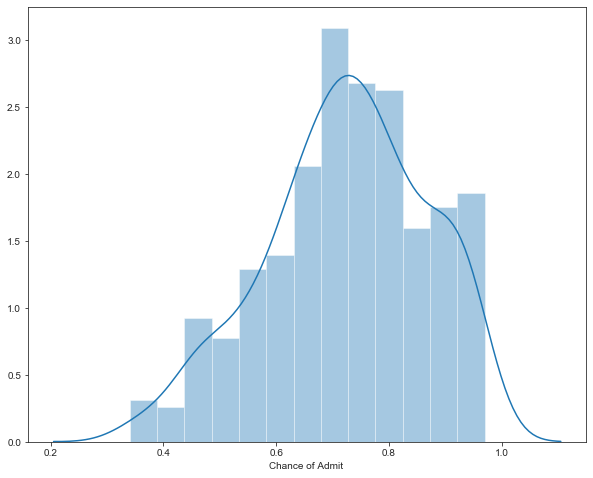

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df['Chance of Admit '])

### __Splitting Data Train & Data Test__

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### __Training Model__

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### __Slope & Intercept__

In [22]:
# Slope
model.coef_

array([ 0.1666591 ,  0.01078912, -0.00409694,  0.01772695,  0.03432148])

In [23]:
Kolom = ['CGPA', 'University Rating', 'SOP', 'LOR ', 'Research']
coef_df = pd.DataFrame(model.coef_, Kolom, columns = ['Coefficient/Slope'])
coef_df

,Coefficient/Slope
CGPA,0.166659
University Rating,0.010789
SOP,-0.004097
LOR,0.017727
Research,0.034321


In [24]:
# Intercept
model.intercept_

-0.8093914932459394

### ``Chance of Admit = 0.166659 CGPA + 0.010789 University Rating - 0.004097 SOP + 0.017727 LOR + 0.034321 Research - 0.8093``

### __R-Squared__

In [25]:
model.score(X_train, y_train)

0.8051518716788211

### __Comparing y Prediction and y Actual__

In [26]:
y_pred = model.predict(X_test)

In [27]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df1.head(20)

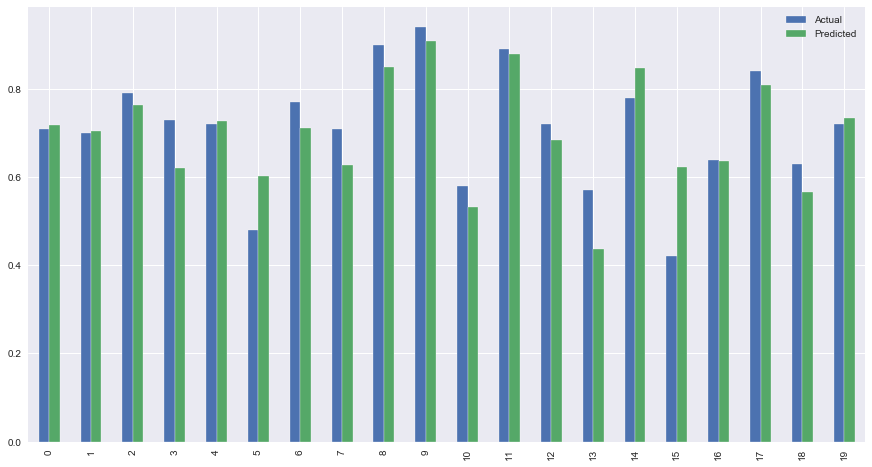

In [29]:
plt.style.use('seaborn')
df1.plot(kind='bar', figsize=(15,8))
plt.show()

### __Evaluating Model using MAE, MSE, RMSE, R2 Score__

In [32]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error (MAE):  0.053851546246950585
Mean Squared Error (MSE):  0.005222945826965653
Root Mean Squared Error (RMSE):  0.0722699510651948
R2 Score:  0.71


In [35]:
mean_price = df['Chance of Admit '].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
maks = metrics.max_error(y_test, y_pred)

print(round(rmse / mean_price * 100, 2), '%')
print(round(mae / mean_price * 100, 2), '%')
print(round(maks / mean_price * 100, 2), '%')

9.98 %
7.43 %
30.11 %


**Root Mean Square Error** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. The lower the RMSE value, the model would be fit well.

**Coefficient Of Determination (R²)** It helps to understand which amount of variation in y can be explained by the dependence on x using the particular regression model. The R² value close to 1, the better the fit. It means, the model can better predict the output(y) for the input(x).

<hr>

## __Perform the linear regression using statsmodels__

In [37]:
X_stat = df[['CGPA','University Rating', 'SOP', 'LOR ', 'Research']].values
y_stat = df['Chance of Admit '].values

X_stat = sm.add_constant(X) # adding a constant

model = sm.OLS(y_stat, X_stat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     294.9
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          9.77e-131
Time:                        11:08:52   Log-Likelihood:                 523.31
No. Observations:                 400   AIC:                            -1035.
Df Residuals:                     394   BIC:                            -1011.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7791      0.068    -11.472      0.0

## Interpreting the Regression Results

Highlight several important components within the results:

-    __Adjusted. R-squared__ reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
-    __const coefficient__ is your Y-intercept. It means that if X variable coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
-    __X1 - X5 coefficient__ represents the change in the output Y due to a change of one unit in each variable
-    __std err__ reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
-    __P >|t|__ is your p-value. A p-value of less than 0.05 is considered to be statistically significant
-    __Confidence Interval__ represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

<hr>

# __Take Class Exercise__
1. Dataset yang digunakan adalah __melb_data.csv__. __X = Distance, Bathroom, Bedroom__ dan  __Y = Price__

2. Buat beberapa percobaan untuk menemukan model MLR terbaik:

3. ``Urutan percobaan 1 (train 80% test 20%)``:
    
    3.a) Distance = filling missing value
    
    3.b) Distance = langkah (a) + drop outlier
    
    3.c) Distance = langkah (a) + scalling
    
5. Di setiap percobaan tampilkan ``MAE, MSE, dan RMSE``


<hr>

# __Take Home Exercise__
1. Dataset yang digunakan adalah Admission_Predict.csv. 

2. Variabel ``X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit``

3. Buat beberapa percobaan untuk menemukan model MLR terbaik

4. Urutan percobaan 1 (train 80% test 20%):

    4.a) Variabel independent tidak ada intervensi sama sekali
    
    4.b) Handling outlier
    
    4.c) Scalling
    
5. Urutan percobaan 2 (train 90% test 10%):

    5.a) Variabel independent tidak ada intervensi sama sekali
    
    5.b) Handle outlier
    
    5.c) Scalling  
    
6. Di setiap percobaan tampilkan MAE, MSE, dan RMSE, serta dibandingkan dengan target

7. Kirim jawaban ke email: nurrokim@purwadhika.com

<hr>

## __Testing Linear Regression Assumptions__

### __I) Linearity__

This assumes that there is a ``linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label)``. This also assumes that the predictors are additive.

Why it can happen: There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

What it will affect: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

How to detect it: If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.

How to fix it: Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

### __II) Normality of the Error Terms__

More specifically, this assumes that ``the error terms of the model are normally distributed``. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

Why it can happen: This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

What it will affect: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

How to detect it: There are a variety of ways to do so, but we’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

How to fix it: It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.

### __III) No Multicollinearity among Predictors__

This assumes that ``the predictors used in the regression are not correlated with each other``. This won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

Why it can happen: A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

What it will affect: Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

How to detect it: There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).

How to fix it: This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.

### __IV) No Autocorrelation of the Error Terms__

This assumes no autocorrelation of the error terms. ``Autocorrelation being present typically indicates that we are missing some information that should be captured by the model``.

Why it can happen: In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

What it will affect: This will impact our model estimates.

How to detect it: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

How to fix it: A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

### __V) Homoscedasticity__

This assumes homoscedasticity, which is the ``same variance within our error terms``. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

Why it can happen: Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

What it will affect: Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

How to detect it: Plot the residuals and see if the variance appears to be uniform.

How to fix it: Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

## __Linear_Regression_Assumption Function__

In [42]:
def linear_regression_assumptions(features, label, feature_names=None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')
        
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()
        
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
       
        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
        
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()

        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        
        
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')

            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected') 
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()


Fitting linear regression

R^2: 0.7891542281385917 

Coefficients
-------------------------------------
Intercept: -0.7790707392080436
X1: 0.16182793295402026
X2: 0.009818533577351747
X3: -0.002024878357554931
X4: 0.0201279696942741
X5: 0.03461649215986662

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\SONY Z\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


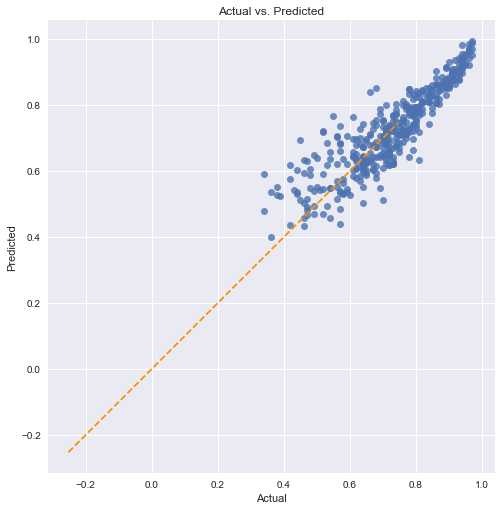

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.129914908559791e-21
Residuals are not normally distributed


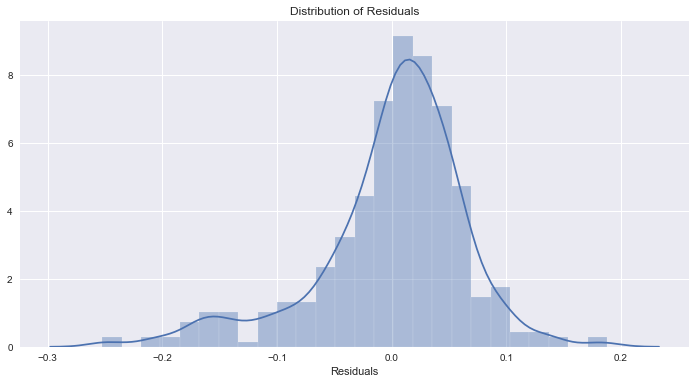


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


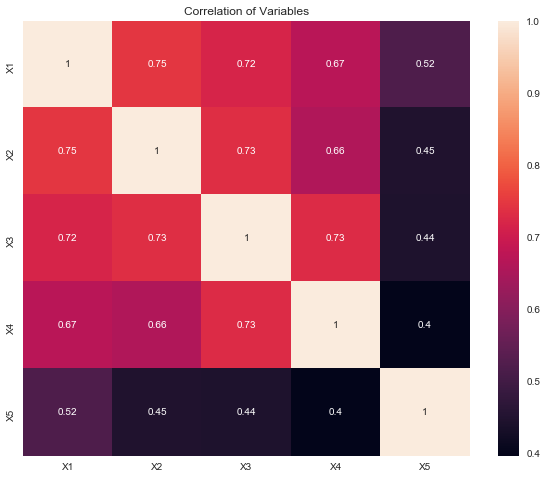

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 24.781833227392283
X2: 20.10534156386021
X3: 36.46128218747673
X4: 37.75742576988611
X5: 2.837728478156257

4 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.817972154299482
Signs of positive autocorrelation 

Assumption not satisfied 

Consider adding lag variables

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant varian

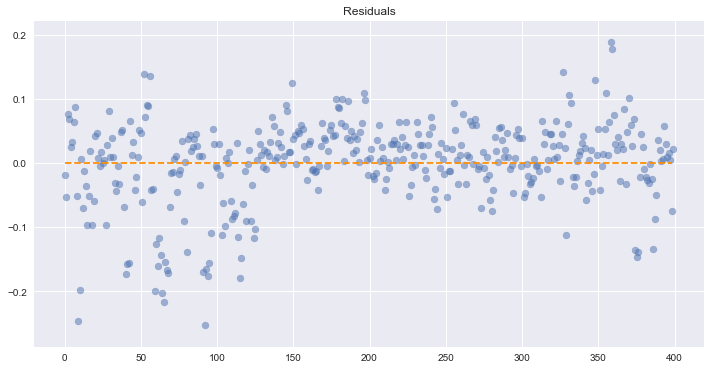

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [43]:
linear_regression_assumptions(X, y)

<hr>

## **Reference**

* Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* Dataset source: https://www.kaggle.com/mohansacharya/graduate-admissions/data
* Manja Bogicevic, "Multiple Linear Regression Using Python", https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0
* Arnav Oberoi, "Multiple Linear Regression-Beginner’s Guide", https://towardsdatascience.com/multiple-linear-regression-beginners-guide-5b602d716aa3
* Abin Joy, "Multiple Linear Regression with Python", https://medium.com/analytics-vidhya/multiple-linear-regression-with-python-98f4a7f1c26c
* Jeff Macaluso, "Testing Linear Regression Assumptions in Python ", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
* Data to Fish, "Linear Regression in Python using Statsmodels", https://datatofish.com/statsmodels-linear-regression/
* Jeff Macaluso, "Testing Linear Regression Assumptions in Python", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/